
# General Plotting
## Primary Results
### Time Domain

In [ ]:
import os
import numpy as np
import pylab as plt
from pandas import read_csv

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
labels = ['dacc-lh', 'dacc-rh', 'dmpfc-lh', 'dmpfc-rh', 'dlpfc_1-lh', 'dlpfc_1-rh', 'dlpfc_2-lh', 'dlpfc_2-rh', 
          'dlpfc_3-lh', 'dlpfc_3-rh', 'dlpfc_4-lh', 'dlpfc_4-rh', 'dlpfc_5-lh', 'dlpfc_5-rh', 
          'dlpfc_6-lh', 'dlpfc_6-rh', 'pcc-lh', 'pcc-rh', 'racc-lh', 'racc-rh']
# labels = ['FCZ']

space = 'source'
model_name = 'revised'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/%s' %space
img_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/plots/%s' %space
info = read_csv(os.path.join(root_dir, 'afMSIT_%s_info.csv' %space))

for label in labels:

    for freq in [15]:

        ## Intialize figure.
        fig = plt.figure(figsize=(16,8))
        axes = []
        
        ## Initialize labels.
        if space == 'sensor': ylabel = 'Voltage (uV)'
        elif space == 'source': ylabel = 'dSPM'
        title = '%s ERP' %(label.replace('_',' ').upper())
        out_path = os.path.join(img_dir, 'timedomain', '%s_%s.png' %(model_name,title.replace(' ','_').lower()))
            
        for n, analysis in enumerate(['stim', 'resp']):
 
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Load source data.
            npz = np.load(os.path.join(root_dir, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']
            
            ## Load cluster results.
            f = os.path.join(root_dir, 'results', '%s_%s_timedomain_results.csv' %(model_name, analysis))
            clusters = read_csv(f)
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot DBS Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ax = plt.subplot2grid((2,2),(n,0))
            for m, color, legend in zip([0,1],['#0571b0','#ca0020'],['DBSoff','DBSon']):
                
                ix, = np.where(info.DBS==m)
                mu = data[ix].mean(axis=0)
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
        
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='DBS')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2) 
                ax.set_ylim(y1,y2)
                
            axes.append(ax)
                
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot Interference Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ax = plt.subplot2grid((2,2),(n,1))
            for m, color, legend in zip([0,1],['#7b3294','#008837'],['Neu','Int']):
                
                ix, = np.where(info.Interference==m)
                mu = data[ix].mean(axis=0)
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
                
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='Interference')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
                ax.set_ylim(y1,y2)
            
            axes.append(ax)
            
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Add Flourishes
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        for i, ax in enumerate(axes):

            ax.legend(loc=2, fontsize=18, markerscale=2, frameon=False, borderpad=0, handletextpad=0.2)
            ax.set_xlabel('Time (s)', fontsize=18)
            if not i%2: ax.set_ylabel(ylabel, fontsize=20)
            ax.tick_params(axis='both', which='major', labelsize=12)
            if not i/2: ax.set_title('Stimulus-Locked', fontsize=24)
            else: ax.set_title('Response-Locked', fontsize=24)

            ## Time-lock specific.
            if not i/2:
                y1, y2 = ax.get_ylim()
                for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                    ax.text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=16)
                    ax.vlines(x,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

            else:
                y1, y2 = ax.get_ylim()
                ax.text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=16)
                ax.vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

        plt.suptitle(title, y=0.99, fontsize=28)
        plt.subplots_adjust(left=0.05, right=0.975, hspace=0.35, wspace=0.15)
        #plt.show()
        plt.savefig(out_path)
        plt.close()

print 'Done.'

### Power Domain

In [ ]:
import os
import numpy as np
import pylab as plt
from pandas import read_csv

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
labels = ['dacc-lh', 'dacc-rh', 'dmpfc-lh', 'dmpfc-rh', 'dlpfc_1-lh', 'dlpfc_1-rh', 'dlpfc_2-lh', 'dlpfc_2-rh', 
          'dlpfc_3-lh', 'dlpfc_3-rh', 'dlpfc_4-lh', 'dlpfc_4-rh', 'dlpfc_5-lh', 'dlpfc_5-rh', 
          'dlpfc_6-lh', 'dlpfc_6-rh', 'pcc-lh', 'pcc-rh', 'racc-lh', 'racc-rh']
# labels = ['FCZ']

space = 'source'
model_name = 'revised'
baseline = (-0.5, -0.1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/%s' %space
img_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/plots/%s' %space
info = read_csv(os.path.join(root_dir, 'afMSIT_%s_info.csv' %space))

for label in labels:

    for freq in ['theta','alpha','beta']:

        ## Intialize figure.
        fig = plt.figure(figsize=(16,8))
        axes = []
        
        ## Initialize labels.
        ylabel = 'Power (dB)'
        title = '%s %s Power' %(label.replace('_',' ').upper(), freq.capitalize())
        out_path = os.path.join(img_dir, 'frequency', '%s_%s.png' %(model_name,title.replace(' ','_').lower()))
            
        for n, analysis in enumerate(['stim', 'resp']):
 
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Load source data.
            npz = np.load(os.path.join(root_dir, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']
            
            ## Load cluster results.
            f = os.path.join(root_dir, 'results', '%s_%s_frequency_results.csv' %(model_name, analysis))
            clusters = read_csv(f)
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot DBS Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ax = plt.subplot2grid((2,2),(n,0))
            for m, color, legend in zip([0,1],['#0571b0','#ca0020'],['DBSoff','DBSon']):
                
                ix, = np.where(info.DBS==m)
                mu = data[ix].mean(axis=0)
                if analysis == 'stim': mu -= mu[(times >= baseline[0])&(times <= baseline[1])].mean()
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
        
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='DBS')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2) 
                ax.set_ylim(y1,y2)
                
            axes.append(ax)
                
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot Interference Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ax = plt.subplot2grid((2,2),(n,1))
            for m, color, legend in zip([0,1],['#7b3294','#008837'],['Neu','Int']):
                
                ix, = np.where(info.Interference==m)
                mu = data[ix].mean(axis=0)
                if analysis == 'stim': mu -= mu[(times >= baseline[0])&(times <= baseline[1])].mean()
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
                
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='Interference')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
                ax.set_ylim(y1,y2)
            
            axes.append(ax)
            
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Add Flourishes
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        for i, ax in enumerate(axes):

            ax.legend(loc=2, fontsize=18, markerscale=2, frameon=False, borderpad=0, handletextpad=0.2)
            ax.set_xlabel('Time (s)', fontsize=18)
            if not i%2: ax.set_ylabel(ylabel, fontsize=20)
            ax.tick_params(axis='both', which='major', labelsize=12)
            if not i/2: ax.set_title('Stimulus-Locked', fontsize=24)
            else: ax.set_title('Response-Locked', fontsize=24)

            ## Time-lock specific.
            if not i/2:
                y1, y2 = ax.get_ylim()
                for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                    ax.text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=16)
                    ax.vlines(x,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

            else:
                y1, y2 = ax.get_ylim()
                ax.text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=16)
                ax.vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

        plt.suptitle(title, y=0.99, fontsize=28)
        plt.subplots_adjust(left=0.05, right=0.975, hspace=0.35, wspace=0.15)
        #plt.show()
        plt.savefig(out_path)
        plt.close()

print 'Done.'

## Secondary Results
### Intertrial Interval Spectra Comparison


In [ ]:
import os
import numpy as np
import pylab as plt
from cmap_utils import *

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and extract data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/source'
npz = np.load( os.path.join(root_dir, 'afMSIT_source_iti_dlpfc_5-lh_spectra.npz') )

## Extract data.
power = npz['power']
times = npz['times']
freqs = npz['freqs']
dbs = (npz['conds'] > 2).astype(int)

## Compute contrasts.
dbs_off = np.log10( np.median( power[dbs==0], axis=0 ) ) * 10
dbs_on = np.log10( np.median( power[dbs==1], axis=0 ) ) * 10
contrast = dbs_on - dbs_off

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot spectrograms.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True)
vmin, vmax = np.floor( np.min([dbs_off, dbs_on]) ), np.ceil( np.max([dbs_off, dbs_on]) )


## Plot DBS-off.
cmap = center_color_map(dbs_off, 'jet')
cbar = axes[0].imshow(dbs_off , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[0],  ticks=np.arange(vmin, vmax+0.01, 0.5))
axes[0].set_ylabel('Frequency', fontsize=18)

## Plot DBS-on.
cmap = center_color_map(dbs_on, 'jet')
cbar = axes[1].imshow(dbs_on , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[1], ticks=np.arange(vmin, vmax+0.01, 0.5))

## Plot contrast.
cmap = center_color_map(contrast, 'jet')
cbar = axes[2].imshow(contrast , aspect='auto', origin='lower', cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(cbar, ax=axes[2], ticks=np.arange(-1,1.1,0.5))

## Add flourishes.
for ax, title in zip(axes, ['DBSoff', 'DBSon', 'On-Off']):
    
    ax.set_xticks(np.linspace(0, times.shape[0], 6))
    ax.set_xticklabels(np.linspace(times.min(), times.max(), 6).round(2))
    ax.set_xlabel('Time (s)', fontsize=16)
    
    ax.set_yticks([0,5,10,15,18,20,22,24])
    ax.set_yticklabels(freqs[[0,5,10,15,18,20,22,24]].astype(int))
    ax.set_title(title, fontsize=20)
    
plt.subplots_adjust(left=0.05, right=0.98, top=0.8)
plt.suptitle('Intertrial Power Spectra', fontsize=28)
plt.show()

### Intertrial Interval Power Spectrum Density

In [ ]:
import os
import numpy as np
import pylab as plt
from mne import EpochsArray, create_info
from mne.time_frequency import psd_multitaper

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Data parameters.
subjects = ['BRTU','CHDR', 'CRDA', 'JADE', 'JASE', 'M5', 'MEWA', 'S2']
method = 'dSPM'
h_freq = 50
roi = 'dlpfc_5-lh'
sfreq = 1450

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Setup.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/source'

epochs, conds = [], []
for subject in subjects:

    ## Load NPZ.
    npz = np.load(os.path.join(root_dir, 'stcs', '%s_msit_iti_%s_%s_epochs.npz' %(subject,method,h_freq)))
    epochs.append(npz['ltcs'])
    conds.append(npz['conds'])

## Concatenate.
epochs = np.concatenate(epochs, axis=0)
conds = np.concatenate(conds, axis=0)
times = npz['times']

## Make into epochs object.
n_trials, n_channels, n_times = epochs.shape

## Make info.
info = create_info([roi], sfreq, ['eeg'])

## Make events.
events = np.zeros((n_trials,3), dtype=int)
events.T[0] = np.arange(n_trials)
events.T[-1] = conds
event_id = dict( FN=1, FI=2, NN=3, NI=4 )

epochs = EpochsArray(epochs, info, events, tmin=-1.25, event_id=event_id, verbose=False)

## Compute PSD.
psd_dbsoff, freqs = psd_multitaper(epochs[['FI','FN']], fmin=0, fmax=50, n_jobs=3, verbose=False)
psd_dbson,  freqs = psd_multitaper(epochs[['NI','NN']], fmin=0, fmax=50, n_jobs=3, verbose=False)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for arr, label, color in zip([psd_dbsoff,psd_dbson], ['DBSoff','DBSon'], ['#0571b0','#ca0020']):
    
    
    mu = arr.squeeze().mean(axis=0)
    mask = (freqs <= 30)
    auc = mu[mask].sum()
    
    arr2 = arr / auc
    
    mu = arr2.squeeze().mean(axis=0)
    sd = arr2.squeeze().std(axis=0)
    se = sd / np.sqrt(arr2.shape[0])
    
    ax.plot(freqs, mu, linewidth=3, label=label, color=color)
    ax.fill_between(freqs, mu-se, mu+se, color=color, alpha=0.2)
    
ax.legend(loc=1)

plt.tight_layout()
plt.show()

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot spectrograms.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True)
vmin, vmax = np.floor( np.min([dbs_off, dbs_on]) ), np.ceil( np.max([dbs_off, dbs_on]) )


## Plot DBS-off.
cmap = center_color_map(dbs_off, 'jet')
cbar = axes[0].imshow(dbs_off , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[0],  ticks=np.arange(vmin, vmax+0.01, 0.5))
axes[0].set_ylabel('Frequency', fontsize=18)

## Plot DBS-on.
cmap = center_color_map(dbs_on, 'jet')
cbar = axes[1].imshow(dbs_on , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[1], ticks=np.arange(vmin, vmax+0.01, 0.5))

## Plot contrast.
cmap = center_color_map(contrast, 'jet')
cbar = axes[2].imshow(contrast , aspect='auto', origin='lower', cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(cbar, ax=axes[2], ticks=np.arange(-1,1.1,0.5))

## Add flourishes.
for ax, title in zip(axes, ['DBSoff', 'DBSon', 'On-Off']):
    
    ax.set_xticks(np.linspace(0, times.shape[0], 6))
    ax.set_xticklabels(np.linspace(times.min(), times.max(), 6).round(2))
    ax.set_xlabel('Time (s)', fontsize=16)
    
    ax.set_yticks([0,5,10,15,18,20,22,24])
    ax.set_yticklabels(freqs[[0,5,10,15,18,20,22,24]].astype(int))
    ax.set_title(title, fontsize=20)
    
plt.subplots_adjust(left=0.05, right=0.98, top=0.8)
plt.suptitle('Intertrial Power Spectra', fontsize=28)
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot power spectrum densities.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.plot(freqs, )

## Anatomical Specificity

In [ ]:
import os
from surfer import Brain
%matplotlib qt4

## Initialize brain.
brain = Brain('fscopy', 'lh', 'pial', subjects_dir='/space/sophia/2/users/EMOTE-DBS/freesurfs')

## Visualize labels.
label_dir = '/space/sophia/2/users/EMOTE-DBS/freesurfs/fscopy/label/april2016'
for label, color in zip(['dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh'],['#377eb8', '#4daf4a', '#e41a1c']):
    brain.add_label('%s/%s.label' %(label_dir,label), color=color, borders=3)
brain.add_label('%s/dlpfc_1-lh.label' %(label_dir), color=color, borders=3)

# Manuscript Figures

## Figure 1
### Behavior Plot (4-panel)

In [36]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set(style="white", font_scale=2.5)

def standard_error(x,y):
    values, counts = np.unique(x,return_counts=True)
    return np.array([ np.std( y[x==v] ) / np.sqrt(c) for v,c in zip(values, counts) ])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Initialize.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(2,2,figsize=(14,12))
df = read_csv('behavior/EMOTE_behav_data.csv')

## DBS effect.
df.DBS = np.where(df.DBS,'ON','OFF')
df = df.sort_values('DBS')
# sns.barplot('DBS', 'origResponseTimes', palette='Greys', data=df, ci=None, ax=axes[0,0])
sns.barplot('DBS', 'origResponseTimes', palette=sns.color_palette(['#0571b0','#ca0020']), 
            data=df, ci=None, ax=axes[0,0])

## Interference effect.
df.interference = np.where(df.interference, 'Interference', 'Control')
sns.barplot('interference', 'origResponseTimes', palette=sns.color_palette(['#7b3294','#008837']), 
            data=df, ci=None, ax=axes[0,1])

## Valence effect.
bins = 10
df.valence = np.digitize(df.valence, np.linspace(0,1.01,bins))
# sns.factorplot('valence', 'origResponseTimes', color='Grey', data=df, ax=axes[1,0])
sns.factorplot('valence', 'origResponseTimes', color='#02818a', data=df, ax=axes[1,0])
plt.close()

## Arousal effect.
df.arousal = np.digitize(df.arousal, np.linspace(0,1.01,bins))
# sns.factorplot('arousal', 'origResponseTimes', color='Grey', data=df, ax=axes[1,1])
sns.factorplot('arousal', 'origResponseTimes', color='#e6550d', data=df, ax=axes[1,1])
plt.close()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

titles = [['DBS','Conflict'],['Valence','Arousal']]

for n in range(2):
    for m in range(2):
        if not n: 
            axes[n,m].set_ylim(0,1.0)
            axes[n,m].hlines(0.875+m*0.075,0.0,1.0)
            axes[n,m].vlines([0,1], 0.85+m*0.075, 0.875+m*0.075)
        else: 
            axes[n,m].set_ylim(0.6,1.2)
            axes[n,m].set_xticks(np.arange(0,9,2))
            axes[n,m].set_xticklabels(np.arange(0,9,2)+1)
            
        if not m: 
            axes[n,m].set_ylabel('Response Time (s)', fontsize=20, weight='bold')
        else:
            axes[n,m].set_ylabel('')
            
        axes[n,m].set_xlabel(titles[n][m], fontsize=28, weight='bold')
        axes[n,m].spines['right'].set_visible(False)
        axes[n,m].spines['top'].set_visible(False)
        
plt.subplots_adjust(top=0.97, bottom=0.1, hspace=0.4, wspace=0.32)
plt.savefig('plots/manuscript/fig1/behavior_barplot.png')
plt.savefig('plots/manuscript/fig1/behavior_barplot.svg')
plt.close()

### MSIT Overlay

In [29]:
import os
from surfer import Brain
%matplotlib qt4

fs_dir = '/autofs/space/sophia_002/users/EMOTE-DBS/freesurfs'
subj_dir = os.environ["SUBJECTS_DIR"]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Surface parameters.
subject = "fscopy"
surf = "inflated"
hemi = 'lh'

## I/O parameters.
overlay = os.path.join(fs_dir, subject, 'label', 'april2016', 'darpa_msit_overlay-lh.mgz')
color = '#AFFF94'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Make Figure.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

labels = ['dacc-lh', 'dmpfc-lh', 'dlpfc_1-lh', 'dlpfc_2-lh', 'dlpfc_3-lh', 
          'dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh', 'pcc-lh', 'racc-lh']

brain = Brain(subject, hemi, surf, background='white')
for label in labels:
    label = os.path.join(fs_dir, subject, 'label', 'april2016', '%s.label' %label)
    brain.add_label(label, color=color, alpha=1, borders=3)
brain.add_overlay(overlay, min=1.301, max=5, sign='pos', name='msit')
brain.overlays['msit'].pos_bar.visible = False

## Lateral view.
brain.show_view(dict(azimuth=150, roll=90), distance=350)
brain.save_image('plots/manuscript/fig1/msit_overlay_lateral.png')

## Medial view.
brain.show_view('medial', distance=425)
brain.save_image('plots/manuscript/fig1/msit_overlay_medial.png')

## Figure 2

### Grand Average Topoplots (Time-Domain)

In [ ]:
import os
import numpy as np
from mne import EpochsArray, combine_evoked, grand_average, read_epochs, set_log_level
from mne.channels import read_montage
from mne.filter import low_pass_filter
set_log_level(verbose=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

subjects = ['BRTU','CHDR','CRDA','JADE','JASE','M5','MEWA','S2']
analyses = ['stim']
task = 'msit'
h_freq = 50

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
montage = read_montage('standard_1020')

for analysis in analyses:

    evokeds = []
    
    for subject in subjects:

        ## Load epochs.
        epochs = read_epochs('ave/%s_%s_%s_%s-epo.fif' %(subject,task,h_freq,analysis))
        
        ## Update channel names according to montage.
        ch_map = dict()
        for ch in epochs.ch_names:
            ix = [m.lower() for m in montage.ch_names].index(ch.lower())
            ch_map[ch] = montage.ch_names[ix]
        epochs.rename_channels(ch_map)
        
        ## Set montage.
        epochs.set_montage(montage)
        
        ## Lowpass filter. Reassemble.
        data = epochs.get_data()        
        data = low_pass_filter(data, epochs.info['sfreq'], 15., filter_length='2s', n_jobs=3,)
        epochs = EpochsArray(data, epochs.info, epochs.events, epochs.tmin, epochs.event_id, proj=False)
        
        ## Compute evoked.
        evokeds.append( epochs.average() )
    
    ## Compute grand average.
    evokeds = grand_average(evokeds)

In [ ]:
evokeds.plot_topomap(times = np.linspace(0.4,0.6,8), cmap='spectral', average=0.2)

### dACC ERPs

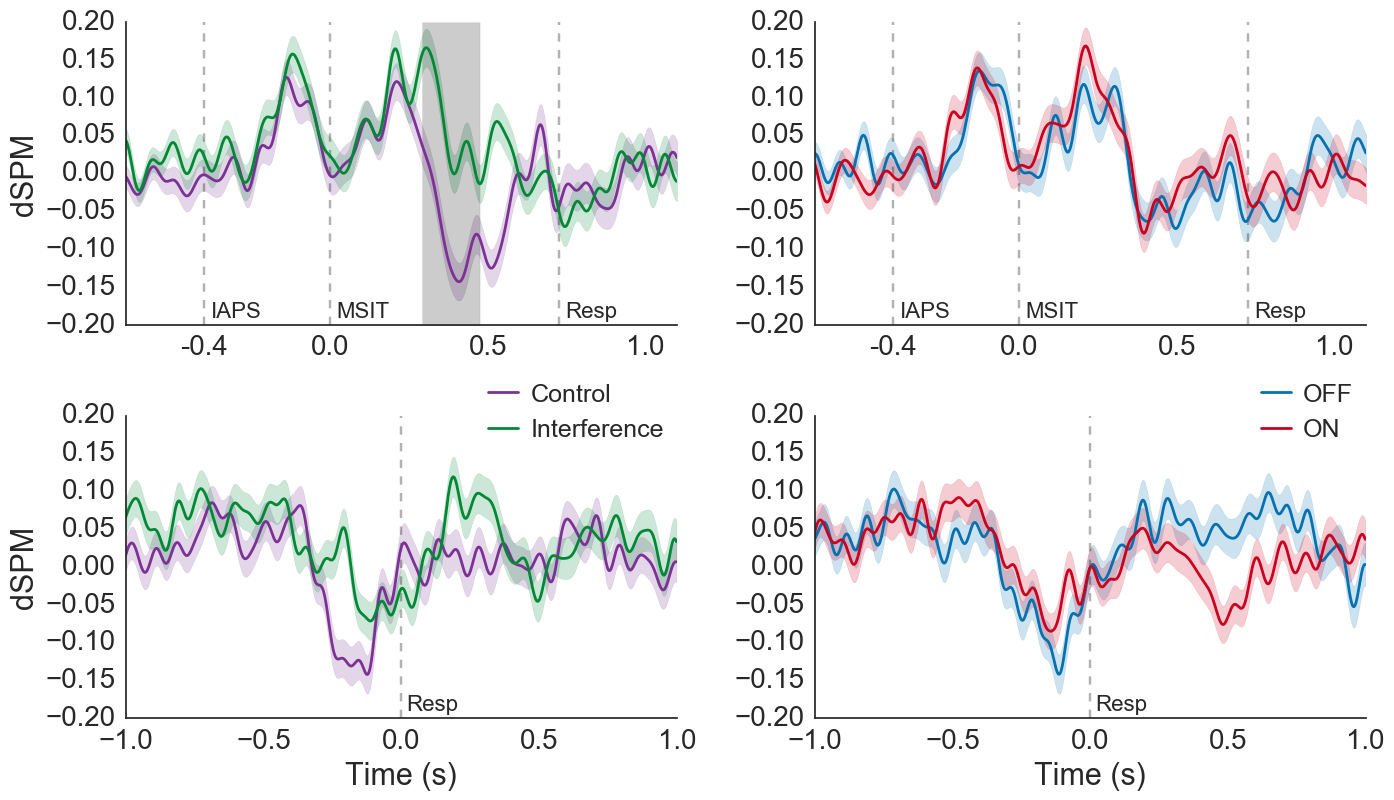

In [87]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set(style="white", font_scale=2.0)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
model_name = 'revised'
space = 'source'
label = 'dacc-lh'
freq = 15

## Plotting parameters.
contrasts = ['Interference','DBS']
palettes = [ ['#7b3294','#008837'], ['#0571b0','#ca0020'] ]
annotations = [ ['Control', 'Interference'], ['OFF','ON'] ]
ylabel = 'dSPM'
y1, y2 = -0.2, 0.2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intialize figure.
fig, axes = plt.subplots(2,2,figsize=(16,8))
info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

for n, contrast, colors, legends in zip(range(2), contrasts, palettes, annotations):
    
    for m, analysis in enumerate(['stim', 'resp']):

        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Load data.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        ## Load source data.
        npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
        data = npz['data']
        times = npz['times']

        ## Load cluster results.
        f = os.path.join(space, 'results', '%s_%s_timedomain_results.csv' %(model_name, analysis))
        clusters = read_csv(f)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Plotting.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        for i, color, legend in zip(range(2),colors,legends):

            ix, = np.where(info[contrast]==i)
            mu = data[ix].mean(axis=0)
            se = data[ix].std(axis=0) / np.sqrt(len(ix))
            axes[m,n].plot(times, mu, linewidth=2, color=color, label=legend)
            axes[m,n].fill_between(times, mu-se, mu+se, color=color, alpha=0.2)

        ## Plot significant clusters.
        axes[n,m].set_ylim(-0.2,0.2)
        for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                           (clusters.Contrast==contrast)&(clusters.FDR<0.05))[0]:
            tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
            axes[m,n].fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Add flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for n in range(2):
    
    for m in range(2):
        
        ## Universal edits.
        axes[n,m].spines['right'].set_visible(False)
        axes[n,m].spines['top'].set_visible(False)
        
        ## Stimulus-locked edits.
        if not n:
            
            ## Fix x-axis.
            xticks = np.array([0.0, 0.4, 0.9, 1.4])
            axes[n,m].set_xticks(xticks)
            axes[n,m].set_xticklabels(xticks - 0.4)
            axes[n,m].set_xlim(-0.25,1.5)
            
            ## Add markers.
            for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                axes[n,m].text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=16)
                axes[n,m].vlines(x,y1,y2,linestyle='--',alpha=0.3)
                
        ## Response-locked edits.
        else:
            
            ## Fix x-axis.
            axes[n,m].set_xlabel('Time (s)')
            
            ## Add markers
            axes[n,m].text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=16)
            axes[n,m].vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
        
            ## Add legends above plot.
            axes[n,m].legend(bbox_to_anchor=(1.0, 1.15), handlelength=1.2, 
                             handletextpad=0.5, borderpad=0, fontsize=18)
        
        ## Add y-labels.
        if not m: axes[n,m].set_ylabel('dSPM')
            
plt.subplots_adjust(top=0.97, bottom=0.1, hspace=0.3, wspace=0.25)
plt.savefig('plots/manuscript/fig2/dacc_erp.png')
plt.savefig('plots/manuscript/fig2/dacc_erp.svg')
plt.show()
plt.close()

## Figure 4

### DLPFC_5-LH Secondary Analysis (Correlations, ROC)

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import DataFrame, read_csv
from scipy.stats import pearsonr
from sklearn.metrics import auc, roc_curve
sns.set(style="white")
sns.set_context(context='paper', font_scale=1.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
space = 'source'
analysis = 'stim'
domain = 'frequency'
model = 'revised'
contrast = 'DBS'
fdr = 0.05
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Prepare clinical scores.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

scores = read_csv('behavior/afMSIT_demographics.csv', index_col=0)
subjects = scores.index

madrs = scores['MADRS_Now'] - scores['MADRS_Base']
mania = scores['Hypomania']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

## Load cluster results.
results = read_csv(os.path.join(space, 'results', '%s_%s_%s_results.csv' %(model,analysis,domain)))
results = results[(results.Contrast==contrast)&(results.FDR<fdr)].reset_index(drop=True)
results = results[results.Label == 'dlpfc_5-lh'] # Limit to the theta clusters.

## Load time series data.
npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space, analysis, 'dlpfc_5-lh', 'theta')))
data = npz['data']
times = npz['times']

## Compute condition differences.
delta = np.zeros(subjects.shape[0])
mask = (times >= results.Tmin.min()) & (times <= results.Tmax.max()) # NOTE: collapsing across clusters

for m, subject in enumerate(subjects):
    i, = np.where((info['Subject']==subject)&(info[contrast]==0))
    j, = np.where((info['Subject']==subject)&(info[contrast]==1))
    delta[m] += (data[j][:,mask].mean(axis=0) - data[i][:,mask].mean(axis=0)).mean()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Correlation plots.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#  
np.random.seed(47404)

## Prepare data.
df = np.concatenate([np.vstack([delta,madrs]), np.vstack([delta,mania])], axis=-1)
df = DataFrame(df.T, columns=['Theta','Data'])
df['Group'] = np.concatenate([np.repeat('MADRS',len(subjects)), np.repeat('Mania',len(subjects))])

## Initialize figures. Plot.
fig = plt.figure(figsize=(12,6))
pal = dict()
for y, c in zip(['MADRS','Mania'],sns.color_palette(palette='deep')): pal[y] = c
G = sns.lmplot('Data','Theta',df,hue='Group',col='Group', palette=pal,sharex=False);
axes, = G.axes;

## Add flourishes to MADRS figure.
axes[0].set_xlabel('MADRS (Post - Pre)', fontsize=18)
axes[0].set_ylabel('Theta Power (On - Off)', fontsize=18)
axes[0].set_title('Depression Response', fontsize=24)
r, p = pearsonr(*df.loc[df.Group=='MADRS',['Theta','Data']].copy().dropna().as_matrix().T)
axes[0].text(axes[0].get_xlim()[0] + np.abs(axes[0].get_xlim()[0])*0.02, 
             axes[0].get_ylim()[-1]*0.97, 
             'r = %0.3f\np = %0.3f' %(r,p), va='top', ha='left')

## Add flourishes to mania figure.
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No History','Converted'], fontsize=18)
axes[1].set_xlabel('')
axes[1].set_title('Mania', fontsize=24)
r, p = pearsonr(*df.loc[df.Group=='Mania',['Theta','Data']].copy().dropna().as_matrix().T)
axes[1].text(axes[1].get_xlim()[0] + np.abs(axes[1].get_xlim()[0])*0.05, 
             axes[1].get_ylim()[-1]*0.97, 
             'r = %0.3f\np = %0.3f' %(r,p), va='top', ha='left')

plt.tight_layout()
# plt.show()
for ext in ['png', 'svg']: plt.savefig('plots/FINAL/clinical_results.%s' %ext)
plt.close('all')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### ROC plots.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#  

## Compute clinical response, ROC, and AUC.
clinical_response = np.where(scores['MADRS_Now'] / scores['MADRS_Base'] > 0.5, 0, 1)
fpr, tpr, thresholds = roc_curve(clinical_response, delta)
roc_auc = auc(tpr, fpr)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
ax.plot(np.linspace(0,1,1e3),np.linspace(0,1,1e3),lw=1,linestyle='--',color='k')

## Add flourishes.
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('Clinical Response ROC', fontsize=24)
ax.legend(loc=4)

# plt.show()
plt.savefig('plots/FINAL/clinical_results_roc.png')
plt.close()
print 'Done.'

## Supplementary Figures

### Methods: AIC Plot

In [ ]:
import rpy2
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import DataFrame, read_csv
%load_ext rpy2.ipython
%R require(lme4)

## Load data.
df = read_csv('EMOTE_behav_data.csv')
df = df[np.where(df.responseTimes,True,False)].reset_index(drop=True)

In [ ]:
%%R -i df -o AICs,BICs

formula = 'responseTimes ~ (1|subject)'
variables = c('interference','DBS','valence','arousal','TrialNum')
AICs = c()
BICs = c()

for (variable in variables){
    formula = paste(formula, variable, sep=' + ')
    model = glmer(formula, data=df, family=Gamma(link='inverse'))
    AICs = c(AICs, AIC(model))
    BICs = c(BICs, BIC(model))
}

In [ ]:
## Build dataframe
variables = np.array(['Con','DBS','Val','Aro','Trial'] * 2)
metrics = np.concatenate([ ['AIC'] * 5, ['BIC'] * 5 ])
fits = DataFrame(dict(Fit = np.concatenate([AICs,BICs]),
                      Model = variables,
                      Metric = metrics))
fits.Fit = np.sign(fits.Fit) * np.log(np.abs(fits.Fit))

## Plotting
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.set(style="white", font_scale=1.75)
g = sns.factorplot(x='Model', y='Fit', hue='Metric', data=fits, 
               palette='colorblind', kind='point', ax=ax, legend=1)

## Flourishes
ax.legend_.set_title(None)
ax.set_xticklabels(fits.Model.unique(), ha='center', weight='bold')
ax.set_xlabel('')
ax.set_yticks(np.linspace(-8.52, -8.48, 2))
ax.set_ylabel('', labelpad=-1.0)
ax.text(-1.0, -8.5, 'Model Deviance (Log Scale)', rotation=90, va='center')

plt.close()
plt.tight_layout()
plt.show()

# DEPRECATED

## Code: Exhaustive model search using AIC/BIC

In [ ]:
import os
import numpy as np
import statsmodels.api as sm
from itertools import combinations
from pandas import DataFrame, read_csv

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
space = 'source'
analysis = 'stim'
domain = 'frequency'
model = 'revised'
contrast = 'DBS'
fdr = 0.05

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Prepare clinical scores.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

scores = read_csv('behavior/afMSIT_demographics.csv', index_col=0)
subjects = scores.index

madrs = scores['MADRS_Now'] - scores['MADRS_Base']
mania = scores['Hypomania']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare power data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

## Load cluster results.
results = read_csv(os.path.join(space, 'results', '%s_%s_%s_results.csv' %(model,analysis,domain)))
results = results[(results.Contrast==contrast)&(results.FDR<fdr)]
results = results[results['Freq']=='theta'].reset_index(drop=True)

## Iteratively compute theta differences.
delta = np.zeros([len(results),len(subjects)])

for n in range(len(results)):
    
    label, tmin, tmax = results.loc[n,['Label','Tmin','Tmax']]
    
    ## Load time series data.
    npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space, analysis, label, 'theta')))
    data = npz['data']
    times = npz['times']
    
    ## Compute condition differences.
    mask = (times >= tmin) & (times <= tmax) # NOTE: collapsing across clusters

    for m, subject in enumerate(subjects):
        i, = np.where((info['Subject']==subject)&(info[contrast]==0))
        j, = np.where((info['Subject']==subject)&(info[contrast]==1))
        delta[n,m] += (data[j][:,mask].mean(axis=0) - data[i][:,mask].mean(axis=0)).mean()
        
## Prepare label names.
labels = np.array([label.replace('-','_') for label in results.Label.as_matrix()], dtype='S12')
for label in np.unique(labels):
    if (labels==label).sum() > 1: 
        labels[np.where(labels==label)[0]] = ['%s%s' %(label,n+1) for n in range((labels==label).sum())]
    else:
        pass
    
## Convert to DataFrame.
delta = DataFrame(delta.T, columns=labels, index=subjects)   
delta['MADRS'] = madrs
delta['Mania'] = mania

## Normalize data.
def zscore(arr): return (arr - arr.mean()) / arr.std()
delta = delta.apply(zscore)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Perform Iterative Regression.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Generate all possible formulas.
formulas = []
for n in range(len(labels)): formulas += list(combinations(labels, n+1))
formulas = np.array([' + '.join(f) for f in formulas])

## Iteratively fit models and store information.
aic, bic = [], []
for formula in formulas:
    
    model = sm.OLS.from_formula('MADRS ~ %s' %formula, delta)
    result = model.fit()
    aic.append( result.aic )
    bic.append( result.bic )
    
## Store in DataFrame.
deviance = DataFrame(np.vstack([formulas,aic,bic]).T, columns=('Formula','AIC','BIC'))
deviance[['AIC','BIC']] = deviance[['AIC','BIC']].astype(float)
deviance = deviance.sort_values('AIC').reset_index(drop=True)

## Code: Generating subject-level bootstraps

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Some useful functions (to replace Seaborn)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#  

def strjoin(arr): return ''.join(arr.astype(str))

def generate_bootstraps(n, n_bootstrap=1000):
    from scipy.misc import factorial
    if factorial(n) < n_bootstrap: raise ValueError('Silly! More bootstraps requested than possible!')
    
    i, bootstraps = 0, np.zeros((n_bootstrap,n)).astype(int)
    bootstrings = np.apply_along_axis(strjoin, 1, bootstraps)
    
    while i < n_bootstrap:
        
        ix = np.sort(np.random.choice(range(n), n, replace=True))
        if len(np.unique(ix)) == 1: pass
        elif strjoin(ix) in bootstrings: pass
        else:
            bootstraps[i] = ix
            bootstrings = np.apply_along_axis(strjoin, 1, bootstraps)
            i += 1
            
    return bootstraps
    
def bootstrap(x,y,df,xlim,ci=95,n_bootstrap=1000):
    from scipy.stats import linregress
    
    ## Remove NaNs.
    df = df[[x,y]].copy().dropna().reset_index(drop=True)
    n = len(df)
    
    ## Preallocate space.
    bootstraps = generate_bootstraps(n, n_bootstrap)
    
    ## Iterate.
    simulations = np.zeros((n_bootstrap,100))
    for i in range(n_bootstrap):
        b1, b0, _, _, _ = linregress(df.loc[bootstraps[i],x], df.loc[bootstraps[i],y])
        simulations[i] = b0 + b1 * np.linspace(xlim[0],xlim[1],100)
        
    ## Return confidence interval.
    lb = np.percentile(simulations, (100 - ci) / 2., axis=0)
    ub = np.percentile(simulations, ci + (100 - ci) / 2., axis=0)
    return lb, ub

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#  
# np.random.seed(21305)
    
# df = DataFrame(np.vstack([delta,madrs,mania]).T, columns=['Theta','MADRS','Mania'])    
# fig, axes = plt.subplots(1,2,figsize=(12,6))

# ## MADRS x Theta.
# axes[0].scatter(df['MADRS'], df['Theta'], s=50, color='#1f78b4')
# x1,x2 = axes[0].get_xlim()
# lb, ub = bootstrap('MADRS','Theta',df,(x1,x2))
# axes[0].fill_between(np.linspace(x1,x2,lb.shape[-1]), lb, ub, color='#1f78b4', alpha=0.2)
# axes[0].set_xlim(x1,x2)

# ## MADRS x Theta.
# axes[1].scatter(df['Mania'], df['Theta'], s=50, color='#1f78b4')
# x1,x2 = axes[0].get_xlim()
# lb, ub = bootstrap('Mania','Theta',df,(x1,x2))
# axes[1].fill_between(np.linspace(x1,x2,lb.shape[-1]), lb, ub, color='#1f78b4', alpha=0.2)
# axes[1].set_xlim(x1,x2)

# ## Save.
# for ext in ['png', 'svg']: plt.savefig('plots/FINAL/clinical_results.%s' %ext, dpi=120)